# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Trương Thuận Kiệt
- MSSV: 22127224
- Lớp: 22CLC01

# Import

In [150]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc dữ liệu

In [151]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [152]:
class OLSLinearRegression:
    def fit(self, X, y):


        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):

        return self.w


    def predict(self, X):

        return X @ self.w   # Equivalent to np.dot(X, self.w). But why?

def mae(y, y_hat):

    return np.mean(np.abs(y.ravel() - y_hat.ravel())) 

# def plot_regression(lr, X, y, feature_names=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']):

#     y_pred = lr.predict(X)
    
#     for i in range(1, X.shape[1]):
#         x = X[:, i]
#         plt.figure()
#         plt.scatter(x, y, color='blue', label='Actual')
#         plt.scatter(x, y_pred, color='red', label='Predicted', alpha=0.5)
#         plt.xlabel(f'Feature: {feature_names[i-1]}')
#         plt.ylabel('Target')
#         plt.title(f'Regression for Feature: {feature_names[i-1]}')
#         plt.legend()
#         plt.show()

def preprocess(X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

In [153]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9000 non-null   int64  
 1   Previous Scores                   9000 non-null   int64  
 2   Extracurricular Activities        9000 non-null   int64  
 3   Sleep Hours                       9000 non-null   int64  
 4   Sample Question Papers Practiced  9000 non-null   int64  
 5   Performance Index                 9000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 422.0 KB


In [154]:
train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889,55.136333
std,2.594647,17.369957,0.499988,1.695533,2.864570,19.187669
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


<Axes: >

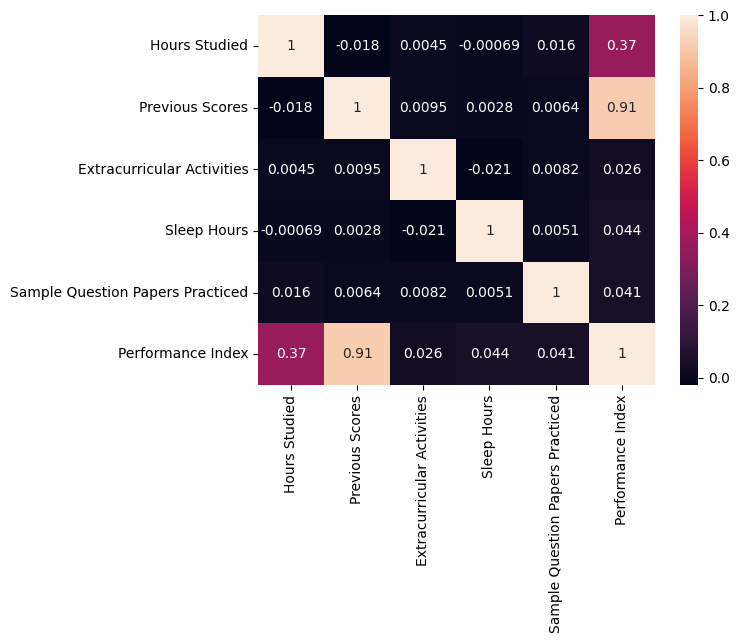

In [155]:
sns.heatmap(train.corr(), annot=True)

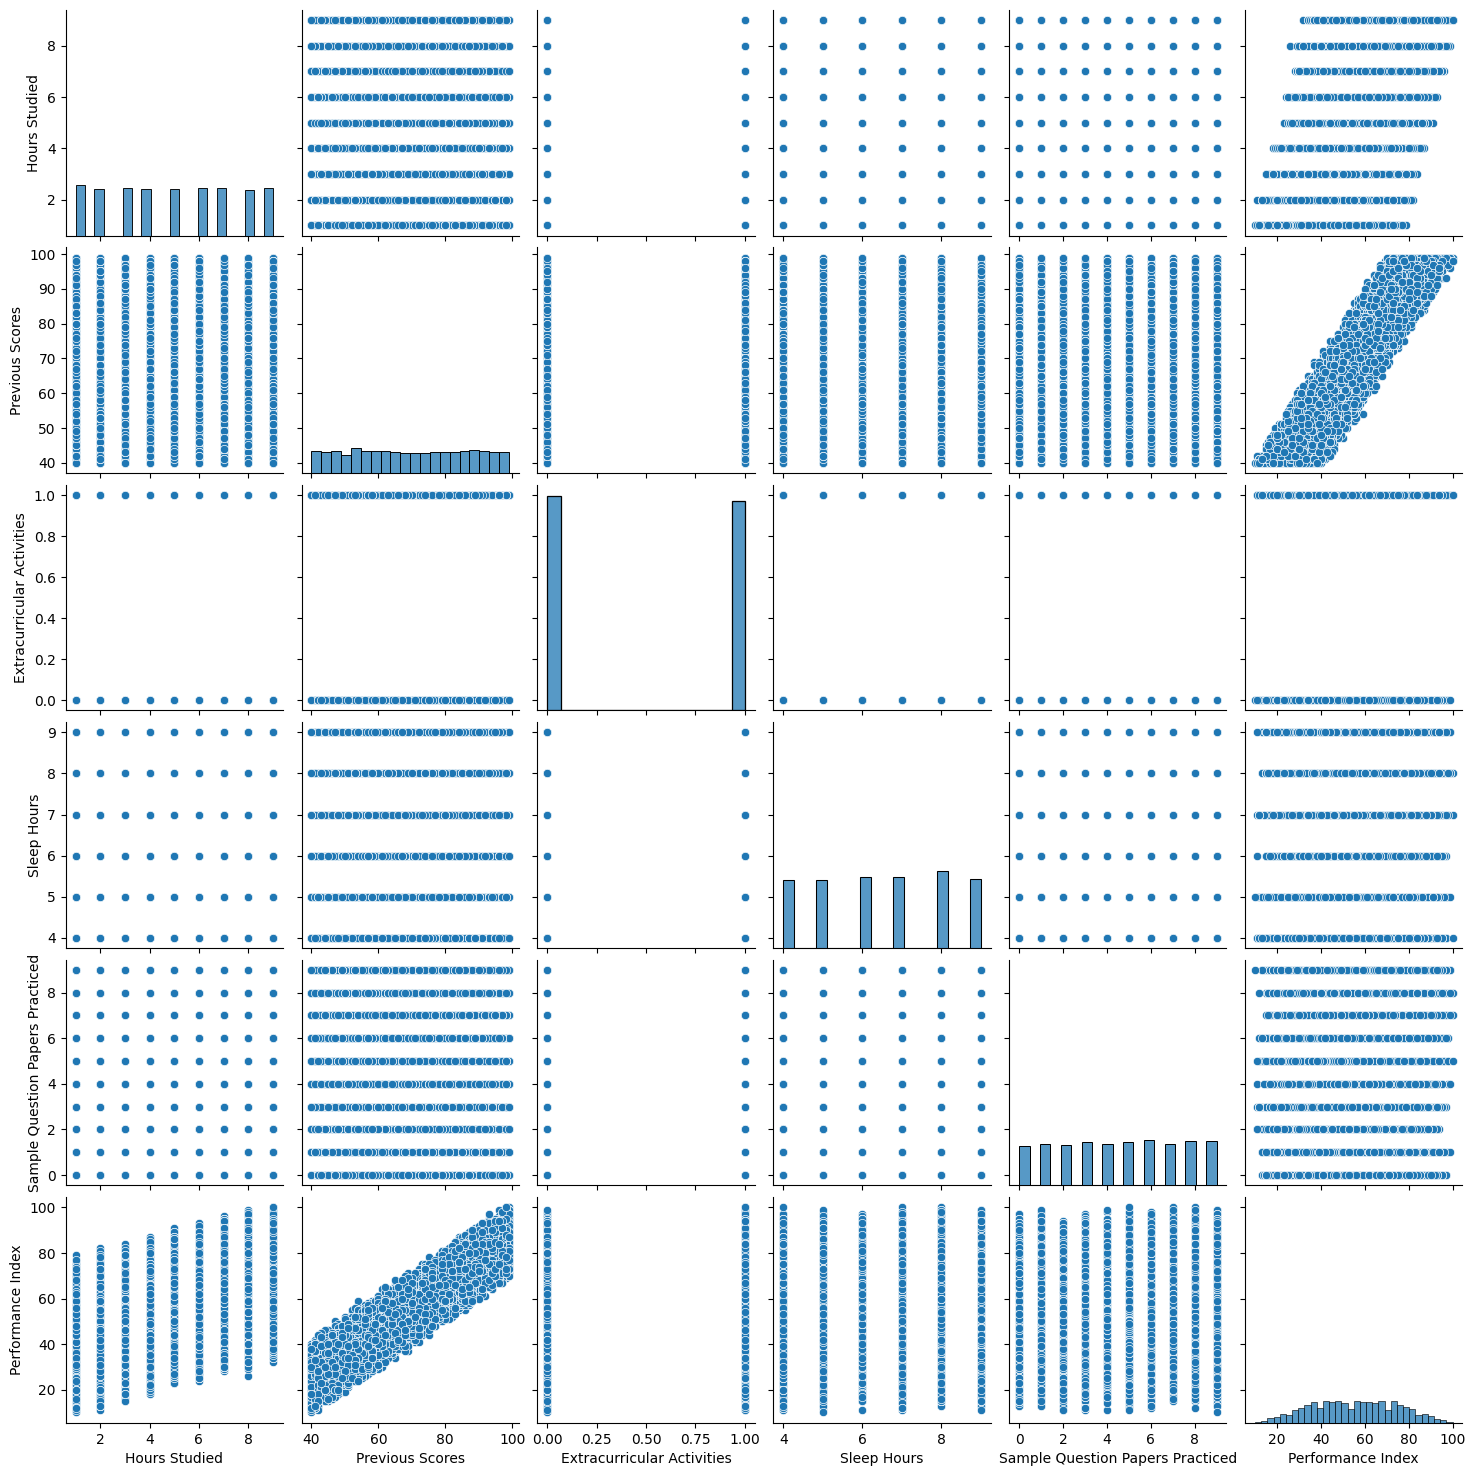

In [156]:
sns.pairplot(train)

# Discover each column

1. Column Hours Studied

In [157]:
train['Hours Studied'].unique()

array([7, 8, 9, 4, 3, 2, 5, 6, 1], dtype=int64)

In [158]:
train['Hours Studied'].value_counts()

Hours Studied
1    1062
7    1012
6    1011
9    1000
3    1000
5     986
2     979
4     978
8     972
Name: count, dtype: int64

<Axes: xlabel='Hours Studied', ylabel='count'>

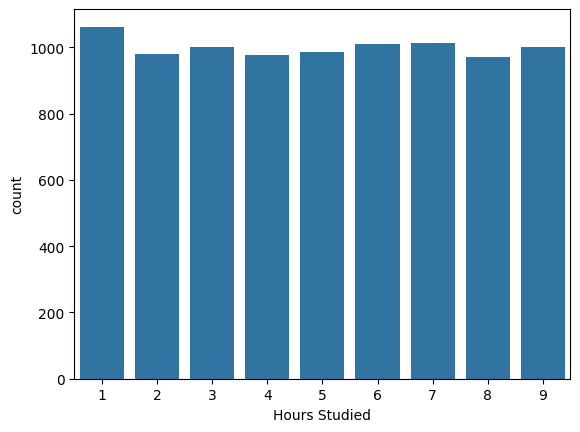

In [159]:
sns.countplot(x='Hours Studied', data=train)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

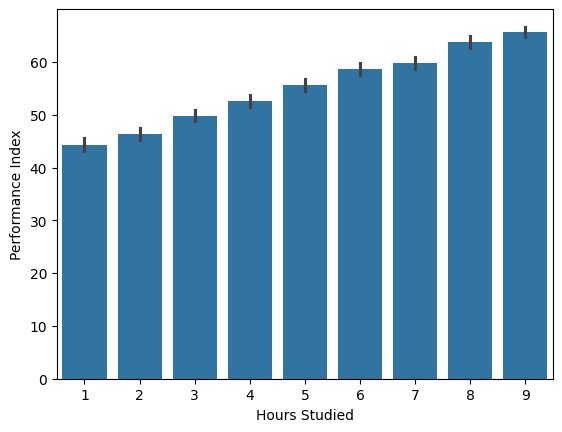

In [160]:
sns.barplot(x='Hours Studied', y='Performance Index', data=train)

-> As can be seen most student spent 1 hour studying
-> The more hours spent to study, the better performance index is => Hours Studied play the vital role in study success

2. Previous Scores

In [161]:
train['Previous Scores'].unique()

array([77, 90, 83, 52, 82, 80, 98, 56, 48, 91, 79, 71, 88, 54, 81, 58, 40,
       46, 41, 96, 43, 64, 45, 44, 66, 57, 76, 75, 69, 68, 89, 67, 92, 42,
       95, 59, 62, 50, 61, 60, 99, 49, 87, 94, 86, 63, 84, 53, 72, 74, 55,
       47, 85, 51, 73, 93, 70, 97, 65, 78], dtype=int64)

In [162]:
train['Previous Scores'].value_counts()

Previous Scores
54    196
87    182
56    180
62    168
53    167
89    165
77    163
52    163
90    162
47    161
83    160
58    159
65    158
84    158
41    158
49    157
95    157
66    157
60    156
67    156
97    155
57    155
92    154
42    154
43    154
93    154
40    153
48    153
79    153
91    152
75    151
46    150
88    150
73    149
70    149
44    149
61    148
59    147
85    146
86    146
78    145
96    145
63    144
98    142
80    142
81    142
71    141
45    140
68    138
99    137
72    136
94    136
69    135
76    130
64    130
82    127
55    127
74    125
51    121
50    112
Name: count, dtype: int64

<Axes: xlabel='Previous Scores', ylabel='count'>

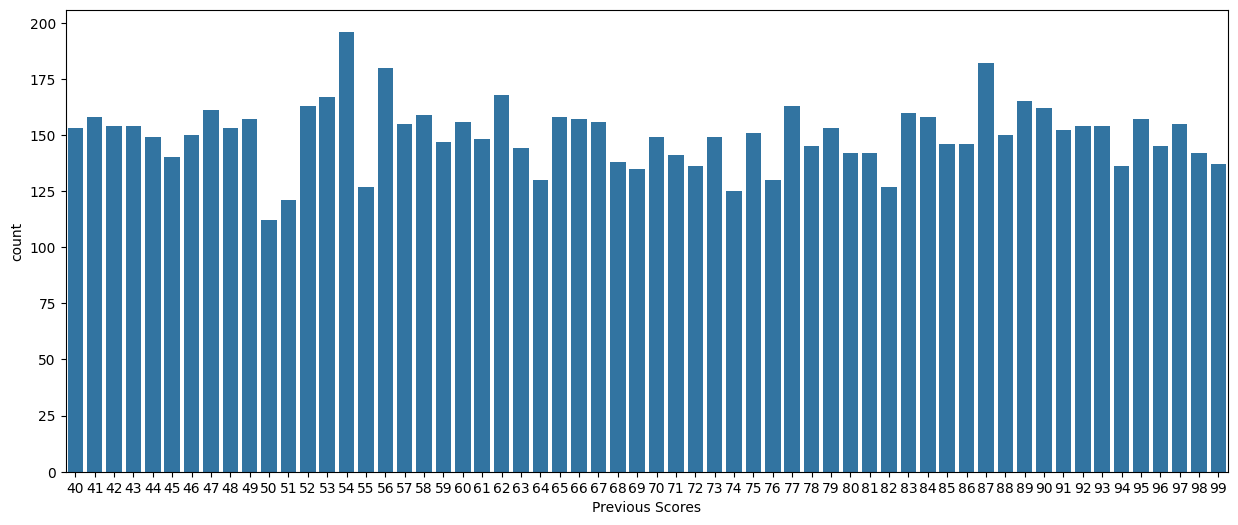

In [163]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Previous Scores', data=train)


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

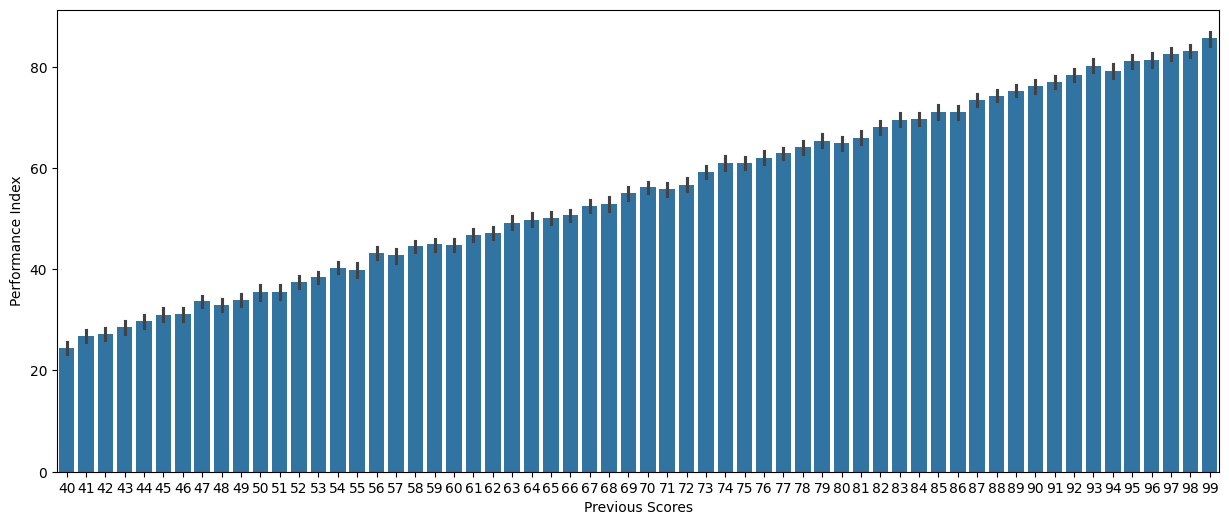

In [164]:
plt.show()
plt.figure(figsize=(15, 6))
sns.barplot(x='Previous Scores', y = train['Performance Index'], data=train)

-> As can be seen, the distribution of previous scores among students is quite equal at each particular mark
-> Also the higher previous scores is, the better performance index is -> The previous scores play important role

3. Extracurricular Activities

([<matplotlib.patches.Wedge at 0x1caa040ad90>,
 [Text(-0.02188504628594985, 1.099782271519714, '0'),
  Text(0.021885149254997367, -1.0997822694706834, '1')],
 [Text(-0.011937297974154463, 0.5998812390107531, '50.6%'),
  Text(0.011937354139089472, -0.5998812378931, '49.4%')])

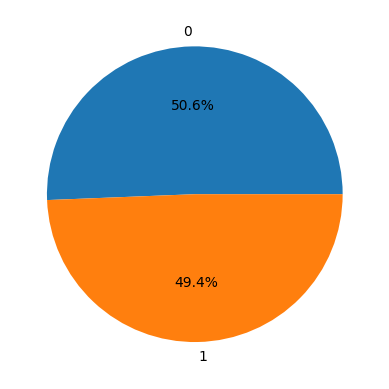

In [165]:
plt.pie(train['Extracurricular Activities'].value_counts(), labels=train['Extracurricular Activities'].value_counts().index, autopct='%1.1f%%')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

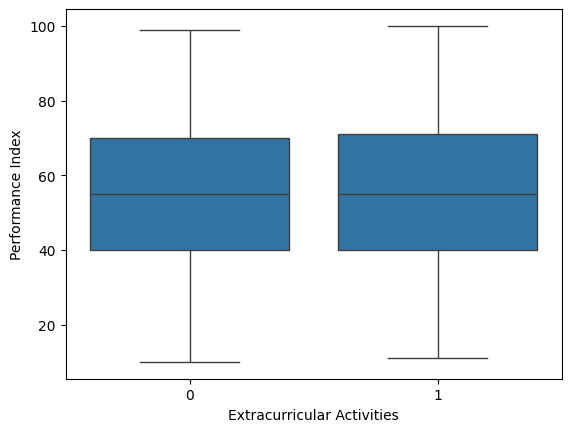

In [166]:
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=train)

-> As can be seen, the number of students participating in and not participating in extracurricular activities are the same
-> But this factor plays a very small extent in affecting performace index

4. Sleep Hours

<Axes: xlabel='Sleep Hours', ylabel='count'>

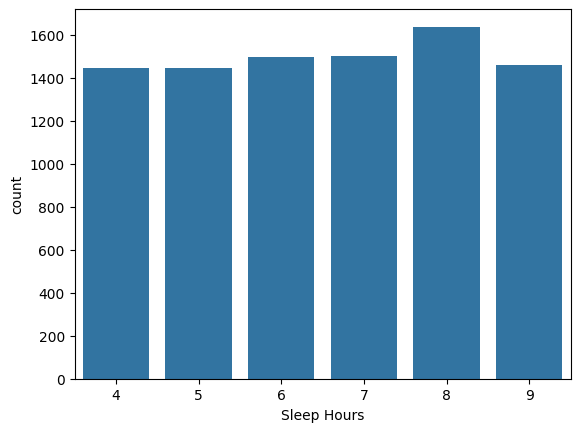

In [167]:
sns.countplot(x='Sleep Hours', data=train)

([<matplotlib.patches.Wedge at 0x1ca9fd75410>,
 [Text(0.9248312026323893, 0.5955562497678357, '8'),
  Text(-0.10810547376570795, 1.0946749319053086, '7'),
  Text(-1.0027015766702865, 0.45231576154598224, '6'),
  Text(-0.9017274127852182, -0.6299902166158431, '9'),
  Text(0.060253611397625036, -1.0983485340790253, '4'),
  Text(0.9626396612346245, -0.5322827092984399, '5')],
 [Text(0.5044533832540304, 0.3248488635097286, '18.2%'),
  Text(-0.05896662205402251, 0.5970954174028955, '16.7%'),
  Text(-0.5469281327292471, 0.2467176881159903, '16.7%'),
  Text(-0.4918513160646644, -0.3436310272450053, '16.2%'),
  Text(0.032865606216886376, -0.599099200406741, '16.1%'),
  Text(0.5250761788552497, -0.29033602325369445, '16.1%')])

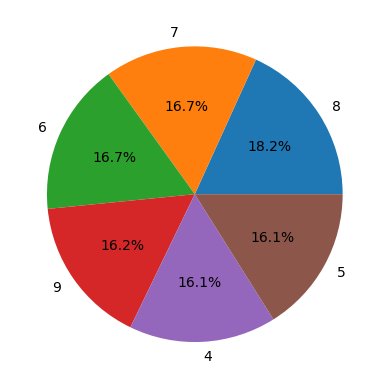

In [168]:
plt.pie(train['Sleep Hours'].value_counts(), labels=train['Sleep Hours'].value_counts().index, autopct='%1.1f%%')

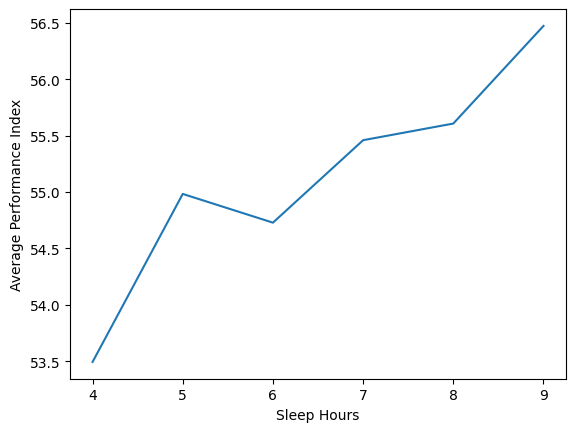

In [169]:
avg_performance_by_hours = train.groupby('Sleep Hours')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Sleep Hours')
plt.ylabel('Average Performance Index')
plt.show()

-> As can be seen, most students sleep about 7 - 8 hours sleeping
-> Also, from the line graph, the more students sleep, the better performance index is, but ths factor is not the vital role in impacting performance index

5. Sample Question Papers Practiced

C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\3656730751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Performance Index', x='Sample Question Papers Practiced', data=train, palette='coolwarm')


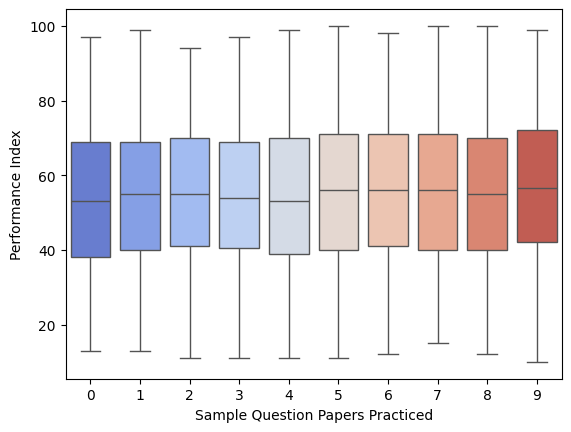

In [170]:
sns.boxplot(y='Performance Index', x='Sample Question Papers Practiced', data=train, palette='coolwarm')
plt.ylabel('Performance Index')
plt.xlabel('Sample Question Papers Practiced')
plt.show()


-> As can be seen, number of sample question papers practiced does not really make difference in performance index
-> Also, this factor affects performance index to a little extent

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [171]:
# Phần code cho yêu cầu 2a
# - Yêu cầu 2a: Sử dụng toàn bộ 5 đặc trưng (2 điểm)
# 	- Huấn luyện 1 lần duy nhất cho 5 đặc trưng trên cho toàn bộ tập huấn luyện (`train.csv`).
# 	- Thể hiện công thức cho mô hình hồi quy (tính $y\ (\text{Student Performance})$ theo 5 đặc trưng).
# 	- Báo cáo **1 kết quả trên tập kiểm tra (`test.csv`)** cho mô hình vừa huấn luyện được.

# Cài đặt các hàm cần thiết ở đây


X_train1a = preprocess(X_train)
X_test1a = preprocess(X_test)

model = OLSLinearRegression()
model.fit(X_train1a, y_train)
print('Train set performance: ')
# plot_regression(model, X_train1a, y_train)

model.get_params()

Train set performance: 


array([-33.96928368,   2.85202007,   1.01786957,   0.60428174,
         0.47356583,   0.19237624])

In [172]:
print('Test set performance: ')
model_t = OLSLinearRegression()
model_t.fit(X_test1a, y_test)

Test set performance: 


In [173]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(X_test1a)
mae(y_test, y_hat)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\2223892123.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))


1.595648688476289

Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 2.852*\text{Hours Studied} + 1.018*\text{Previous Scores} + \ 0.604*\text{Extracurricular Activities}+ 
0.474*\text{Sleep Hours} +  0.192*\text{Sample Question Papers Practiced} -33.969$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [174]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
def k_fold_cross_validation(X, k=5):
    '''
    Chia tập dữ liệu X thành k phần bằng nhau để thực hiện K-Fold Cross-Validation.

    Parameters:
    -----------
    X : np.ndarray
        Ma trận dữ liệu đầu vào với mỗi hàng là một mẫu và mỗi cột là một đặc trưng.
    k : int, optional
        Số lượng fold để chia dữ liệu (mặc định là 5).

    Returns:
    --------
    List[Tuple[np.ndarray, np.ndarray]]
        Danh sách chứa k phần tử, mỗi phần tử là một tuple (train_indices, test_indices) với:
        - train_indices: mảng chứa các chỉ số của các mẫu dữ liệu được dùng để huấn luyện mô hình.
        - test_indices: mảng chứa các chỉ số của các mẫu dữ liệu được dùng để kiểm tra mô hình.
    '''
    n = X.shape[0]
    fold_size = n // k
    indices = np.arange(n)
    # np.random.shuffle(indices)  
    
    folds = []
    for i in range(k): # B2: Tách k fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    
    return folds

# B1: Shuffle dataset (D_train)
train_shuffle = train.sample(frac=1).reset_index(drop=True)

# Define the feature labels correctly as per the DataFrame
label = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
list_mae = []
k = 5

# Extract features and target from the training data
X_train1 = train_shuffle.iloc[:, 0:5].values    # DataFrame containing 5 features
y_train1 = train_shuffle.iloc[:, -1].values     # Series containing the target

# B3-B6: Train, validate, and select the best model

for name in label:
    # Ensure X_train_clone is a DataFrame with a single column
    feature_index = label.index(name)
    X_train_clone = X_train1[:, [feature_index]].copy()
    y_train_clone = y_train1.copy()
    
    # Initialize MAE for this feature
    MAE = 0
    print('Feature:', name)
    # Get the fold indices
    fold_indices = k_fold_cross_validation(X_train_clone, k)
    
    for train_indices, test_indices in fold_indices:  # B3-B5: Train and validate
        train_X2, test_X2 = X_train_clone[train_indices], X_train_clone[test_indices]
        train_y2, test_y2 = y_train_clone[train_indices], y_train_clone[test_indices]
        
        train_X2 = preprocess(train_X2)
        test_X2 = preprocess(test_X2)
        
        lr = OLSLinearRegression()
        lr.fit(train_X2, train_y2)
        y_pred = lr.predict(test_X2)
        
        MAE += mae(test_y2, y_pred)
        print(mae(test_y2, y_pred))
    list_mae.append([name, MAE / k])
    

sorted_mae = sorted(list_mae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('The best feature is:', min_mae[0])

# B6: Train lại mô hình tốt nhất với dataset D_train
best_feature_name = min_mae[0]
report = pd.DataFrame(list_mae, columns=['Feature', 'MAE'])
report

Feature: Hours Studied
15.301165707629366
15.601946875332242
15.288403179376859
15.71681437628033
15.368196989161511
Feature: Previous Scores
6.523562446609711
6.778770828630133
6.642265057512893
6.6043596471380095
6.555578832470456
Feature: Extracurricular Activities
15.712319974399659
16.25800244094246
16.30112573480831
16.62699737222247
16.079852087772057
Feature: Sleep Hours
15.751256007011005
16.26336065928619
16.26548205195893
16.610507227224936
16.064024533993827
Feature: Sample Question Papers Practiced
15.717876944886985
16.23110962410841
16.278320668700808
16.647716655080888
16.05857860552269
The best feature is: Previous Scores


,Feature,MAE
0,Hours Studied,15.455305
1,Previous Scores,6.620907
2,Extracurricular Activities,16.195660
3,Sleep Hours,16.190926
4,Sample Question Papers Practiced,16.186720


In [175]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_feature = min_mae[0]
best_feature_index = label.index(best_feature)
X_best_feature = X_train1[:, [best_feature_index]]

print('Best feature:', X_best_feature)
X_best_feature = preprocess(X_best_feature)

print(X_best_feature)
# Train the model using the best feature
best_feature_model = OLSLinearRegression()
best_feature_model.fit(X_best_feature, y_train1)
best_feature_model.get_params()

Best feature: [[67]
 [68]
 [95]
 ...
 [77]
 [79]
 [76]]
[[ 1. 67.]
 [ 1. 68.]
 [ 1. 95.]
 ...
 [ 1. 77.]
 [ 1. 79.]
 [ 1. 76.]]


array([-14.98864578,   1.01050301])

In [176]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model

# B7: Kiểm tra mô hình tốt nhất với D_test

X_test_2b = test.iloc[:, [best_feature_index]].values
X_test_2b = preprocess(X_test_2b)
y_hat_best_feature = best_feature_model.predict(X_test_2b)
mae_best_feature = mae(y_test, y_hat_best_feature)
print('MAE on test set using the best feature:', mae_best_feature)

MAE on test set using the best feature: 6.5442772934525015


C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\2223892123.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 1.010*\text{Previous Scores} -14.989$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [181]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
def model1 (train):
    '''
    Tạo và trả về dữ liệu huấn luyện từ tập dữ liệu đầu vào với một số biến chuyển đổi.

    Parameters:
    -----------
    train : pd.DataFrame
        DataFrame chứa tập dữ liệu đầu vào, mỗi hàng là một mẫu và các cột đại diện cho các đặc trưng và mục tiêu.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray]
        - X: Ma trận numpy chứa các biến đặc trưng đã được chọn và chuyển đổi.
        - y: Mảng numpy chứa mục tiêu (điểm số) tương ứng với mỗi mẫu trong X.
    
    Biến chuyển đổi:
    ----------------
    - 'Extracurricular Activities * Sample Question Papers Practiced / Sample Question Papers Practiced':
      Tính bằng cách nhân 'Extracurricular Activities' với 'Sample Question Papers Practiced' và chia cho 'Sleep Hours', sau đó lấy căn bậc hai của kết quả.
    '''
    X_train_model1 = train.iloc[:, 0:5].copy()
    y_train_model1 = train.iloc[:, -1].values
    # Thêm các cột mới cho các biến bình phương
    X_train_model1['Hours Studied'] = X_train_model1['Hours Studied'] 
    X_train_model1['Previous Scores'] = X_train_model1['Previous Scores'] 
    X_train_model1['(Extracurricular Activities * Sample Question Papers Practiced/Sample Question Papers Practiced)^(1/2)'] = ((X_train_model1['Extracurricular Activities'] * X_train_model1['Sample Question Papers Practiced']) / X_train_model1['Sleep Hours']) ** (1/2)

    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
    X = X_train_model1[['Hours Studied', 'Previous Scores', '(Extracurricular Activities * Sample Question Papers Practiced/Sample Question Papers Practiced)^(1/2)']].values
    y = y_train_model1
    return X, y

def model2(train):
    '''
    Tạo và trả về dữ liệu huấn luyện từ tập dữ liệu đầu vào với hai biến đặc trưng cơ bản.

    Parameters:
    -----------
    train : pd.DataFrame
        DataFrame chứa tập dữ liệu đầu vào, mỗi hàng là một mẫu và các cột đại diện cho các đặc trưng và mục tiêu.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray]
        - X: Ma trận numpy chứa các biến đặc trưng đã được chọn ('Hours Studied' và 'Previous Scores').
        - y: Mảng numpy chứa mục tiêu (điểm số) tương ứng với mỗi mẫu trong X.
    '''
    X_train_model1 = train.iloc[:, 0:2].copy()
    y_train_model1 = train.iloc[:, -1].values

    # Thêm các cột mới cho các biến bình phương
    X_train_model1['Hours Studied'] = X_train_model1['Hours Studied'] 
    X_train_model1['Previous Scores'] = X_train_model1['Previous Scores'] 

    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
    X = X_train_model1[['Hours Studied', 'Previous Scores']].values
    y = y_train_model1
    return X, y

def model3(train):
    '''
    Tạo và trả về dữ liệu huấn luyện từ tập dữ liệu đầu vào với một số biến chuyển đổi.

    Parameters:
    -----------
    train : pd.DataFrame
        DataFrame chứa tập dữ liệu đầu vào, mỗi hàng là một mẫu và các cột đại diện cho các đặc trưng và mục tiêu.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray]
        - X: Ma trận numpy chứa các biến đặc trưng đã được chọn và chuyển đổi.
        - y: Mảng numpy chứa mục tiêu (điểm số) tương ứng với mỗi mẫu trong X.
    
    Biến chuyển đổi:
    ----------------
    - '(Sample Question Papers Practiced/Sleep Hours)^(1/2)':
    Tính bằng cách chia 'Sample Question Papers Practiced' cho 'Sleep Hours', sau đó lấy căn bậc hai của kết quả.
    '''
    X_train_model1 = train.iloc[:, 0:5].copy()
    y_train_model1 = train.iloc[:, -1].values

    # Thêm các cột mới cho các biến bình phương
    X_train_model1['Hours Studied'] = X_train_model1['Hours Studied'] 
    X_train_model1['Previous Scores'] = X_train_model1['Previous Scores'] 
    X_train_model1['(Sample Question Papers Practiced/Sleep Hours)^(1/2)'] = ((X_train_model1['Sample Question Papers Practiced']) / X_train_model1['Sleep Hours']) ** (1/2)

    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
    X = X_train_model1[['Hours Studied', 'Previous Scores', '(Sample Question Papers Practiced/Sleep Hours)^(1/2)']].values
    y = y_train_model1
    return X, y

def model4(train):
    '''
    Tạo và trả về dữ liệu huấn luyện từ tập dữ liệu đầu vào với hai biến đặc trưng cơ bản.

    Parameters:
    -----------
    train : pd.DataFrame
        DataFrame chứa tập dữ liệu đầu vào, mỗi hàng là một mẫu và các cột đại diện cho các đặc trưng và mục tiêu.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray]
        - X: Ma trận numpy chứa các biến đặc trưng đã được chọn ('Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced').
        - y: Mảng numpy chứa mục tiêu (điểm số) tương ứng với mỗi mẫu trong X.
    '''
    X_train_model1 = train.iloc[:, 0:5].copy()
    y_train_model1 = train.iloc[:, -1].values

    # Thêm các cột mới cho các biến bình phương
    X_train_model1['Hours Studied'] = X_train_model1['Hours Studied'] 
    X_train_model1['Previous Scores'] = X_train_model1['Previous Scores'] 
    X_train_model1['Sample Question Papers Practiced'] = X_train_model1['Sample Question Papers Practiced']
    X_train_model1['Sleep Hours'] = X_train_model1['Sleep Hours']
    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
    X = X_train_model1[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values
    y = y_train_model1
    return X, y


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [182]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
k = 5
list_mae_self_made_models = []

train_shuffle = train.sample(frac=1).reset_index(drop=True)

i = 1
for i in range (1,5):
    print(i)
    mae_scores = []
    if (i == 1):
        X, y = model1(train_shuffle)
    elif (i == 2):
        X, y = model2(train_shuffle)
    elif (i == 3):
        X, y = model3(train_shuffle)
    else:
        X, y = model4(train_shuffle)
        
    folds = k_fold_cross_validation(X, k=k)
    print(f'Model {i}')
    for train_indices, test_indices in folds:
        X_train2, X_test2 = X[train_indices], X[test_indices]
        y_train2, y_test2 = y[train_indices], y[test_indices]
        
        X_train2 = preprocess(X_train2)
        X_test2 = preprocess(X_test2)
        
        # Khởi tạo và huấn luyện mô hình
        model = OLSLinearRegression()
        model.fit(X_train2, y_train2)
        
        # Dự đoán với tập kiểm tra
        y_pred = model.predict(X_test2)
        mae_scores.append(mae(y_test2, y_pred))    
        print(mae(y_test2, y_pred))
    # Đánh giá mô hình
    print(f'Mean Absolute Error: {np.mean(mae_scores)}')
    list_mae_self_made_models.append([f'Model {i}',np.mean(mae_scores)])

best_model_index = min(list_mae_self_made_models, key=lambda x: x[1])[0]
print(f'The best model is: {best_model_index}')
report = pd.DataFrame(list_mae_self_made_models, columns=['Model', 'MAE'])
report

1
Model 1
1.8194425438672048
1.786907243179609
1.8152939054317225
1.7387071787943182
1.813029860809761
Mean Absolute Error: 1.794676146416523
2
Model 2
1.8412266845779208
1.8021999905026878
1.8369624986360524
1.7694435063211151
1.833621497041334
Mean Absolute Error: 1.816690835415822
3
Model 3
1.8261369652082888
1.7994222565075169
1.817370851758808
1.7547850599977248
1.8271853498581534
Mean Absolute Error: 1.8049800966660985
4
Model 4
1.667614414927129
1.6222648739520584
1.672323658019426
1.6182790824861422
1.629236968358857
Mean Absolute Error: 1.6419437995487225
The best model is: Model 4


,Model,MAE
0,Model 1,1.794676
1,Model 2,1.816691
2,Model 3,1.804980
3,Model 4,1.641944


In [183]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
if (best_model_index == 'Model 1'):
    X_train_2c, y_train_2c = model1(train_shuffle)
elif (best_model_index == 'Model 2'):
    X_train_2c, y_train_2c = model2(train_shuffle)
elif (best_model_index == 'Model 3'):
    X_train_2c, y_train_2c = model3(train_shuffle)
else:
    X_train_2c, y_train_2c = model4(train_shuffle)
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
X_test_2c, y_test_2c = model1(test) if best_model_index == 'Model 1' else model2(test) if best_model_index == 'Model 2' else model3(test) if best_model_index == 'Model 3' else model4(test)

X_train_2c = preprocess(X_train_2c)
X_test_2c = preprocess(X_test_2c)


my_best_model = OLSLinearRegression()
my_best_model.fit(X_train_2c, y_train_2c)
params = my_best_model.get_params()
print(f'Model parameters: {params}')

Model parameters: [-33.66490795   2.85254922   1.01803696   0.46985264   0.19323805]


In [184]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

y_hat_best_model = my_best_model.predict(X_test_2c)
mae_best_model = mae(y_test_2c, y_hat_best_model)
print(f'MAE on test set using the best model: {mae_best_model}')


MAE on test set using the best model: 1.6136875904819854


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 2.852*\text{Hours Studied} + 1.018*\text{Previous Scores} + 0.470*\text{Sleep Hours}  + \ 0.193*\text{Sample Question Papers Practiced} -33.665$$